In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import pandas as pd
from time import time


In [3]:
market = pd.read_csv('market_zero_na_robust_scaler.csv')

In [4]:
from sklearn.cluster import MiniBatchKMeans

In [5]:
t0 = time()
k_me = MiniBatchKMeans(n_clusters=5,
                      random_state=42,
                      batch_size=12)
k_me.fit(market.drop(columns=['id']))
t1 = time()

In [6]:
(t1-t0)/60

9.84390829404195

In [8]:
import pickle as pkl

pkl.dump(k_me, open('k_means_drop_na_robust_scaled.sav', 'wb'))

In [10]:
loaded_model = pkl.load(open('k_means_drop_na_robust_scaled.sav', 'rb'))

Type:        MiniBatchKMeans
String form: MiniBatchKMeans(batch_size=12, n_clusters=5, random_state=42)
File:        c:\anaconda3\envs\pca_rfe\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
Mini-Batch K-Means clustering.

Read more in the :ref:`User Guide <mini_batch_kmeans>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

max_iter : int, default=100
    Maximum number of iterati

In [14]:
market['cluster']=k_me.labels_

In [15]:
market['cluster'].value_counts()

3    192053
0    159851
1     64942
4     10670
2      4776
Name: cluster, dtype: int64

In [63]:
port1 = pd.read_csv('data/raw/estaticos_portfolio1.csv')

In [66]:
port1 = port1['id']

In [96]:
market.loc[market['id'].isin(port1)]['cluster'].value_counts()/len(port1)

3    0.702703
1    0.227027
4    0.019820
2    0.003604
Name: cluster, dtype: float64

In [98]:
len(port1.loc[~port1.isin(market.id)])

26

In [93]:
port2 = pd.read_csv('data/raw/estaticos_portfolio2.csv')
port2 = port2['id']
market.loc[market['id'].isin(port2)]['cluster'].value_counts()/len(port2)

4    0.94523
2    0.05477
Name: cluster, dtype: float64

In [99]:
len(port2.loc[~port2.isin(market.id)])

0

In [16]:
port3 = pd.read_csv('data/raw/estaticos_portfolio3.csv')
port3 = port3['id']
market.loc[market['id'].isin(port3)]['cluster'].value_counts()/len(port3)

4    0.932075
2    0.067925
Name: cluster, dtype: float64

In [17]:
len(port3.loc[~port3.isin(market.id)])

0

In [52]:
centroid = pd.DataFrame(k_me.cluster_centers_, columns=market.drop(columns=['id','cluster']).columns)

In [61]:
from matplotlib import pyplot as plt

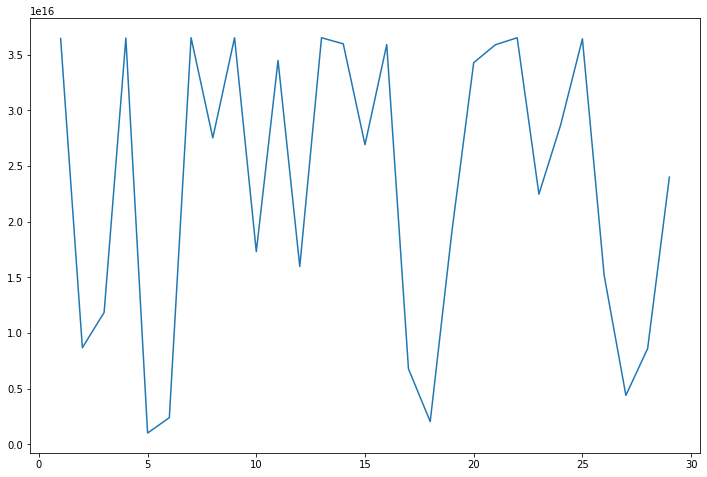

In [63]:
clean_market = market.drop(columns=['id', 'fl_st_especial_True','fl_st_especial_False','fl_ltda_True','fl_ltda_False', 'fl_epp_False',  'natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS', 'fl_spa_False', 'fl_spa_True', 'fl_simples_irregular_False', 'fl_simples_irregular_True'])

inertia = []

for i in range (1,30):
    kmeans = MiniBatchKMeans(i)
    kmeans.fit(clean_market)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,30), inertia)
plt.show();

In [ ]:
from sklearn.preprocessing import robust_scale

In [6]:
t0 = time()
agg_c = AgglomerativeClustering().fit(market)
t1 = time()

MemoryError: Unable to allocate 696. GiB for an array with shape (93437970486,) and data type float64